<a href="https://colab.research.google.com/github/gouravgujariya/Breast-cancer-classifier-95-/blob/main/Breastcancerpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IBM assignment for supervised classification models


This dataset is taken from kaggle and it is for prediction if a women is showing the symphtoms of the breast cancer or not so meddical treatment could be provided faster or farther delay in medical providence or wasting time in medical test could be overcome 

Objective:<list>
1. Understand the Dataset & cleanup (if required).
2. Build classification models to predict whether the cancer type is Malignant or Benign.
3. Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

###DATASET

1. Unique ID: unique id for every petiant
2. Diagnosis:it is the targeting columns and contain two value Malignant B-Benign
3. radius_mean:this is the mean of radius of lobes if present any
4. texture_mean:Mean of the surface texture
5. perimeter_mean:outer perimenter of lobes.
6. area_mean:mean area of the lobes 
7. smoothness_mean:mean of smoothness levels
8. compactness_mean:mean of compactness
9. concavity_mean:mean of concavity
10. concave points_mean:mean of concave points
11. symmetry_mean:mean of symmetry
12. fractal_dimension_mean:mean of fractal dimension
13. radius_se:SE of radius
14. texture_se:SE of texture
15. perimeter_se:perimeter of SE
16. area_se:area of se
17. smoothness_se:SE of the smoothness
18. compactnes_se:se of compacness
19. concavity_se:see of concavity
20. concave points_se:se of concave points
21. symmeetry_se:se of symmetry
22. fractal_simension_se:se of fractal Dimension
23. radius_worst:worst radius
24. texture_worst:worst texture
25. perimeter_worst:worst perimeter
26. area_worst:worst area
27. smoothness_worst:worst smoothness
28. compactness_worst:worse compactness
29. concavity_worst:worst concavity
30. concave points_worst:worst concave points
31. symmetry_worst:worst symmetry
32. fractal_dimension_worst:worst fractal dimension


These are the features of the following breast cancer dataset lets import and take an insite of the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dftrain=pd.read_csv('/content/drive/MyDrive/Python Scripts/kaggle/brestcancer/breast-cancer.csv')

In [12]:
dftrain.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [37]:
dftrain.shape

(569, 32)

In [13]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here we can see that there are in total <list>
1. 30 float
2. 1 int
3. 1 object <br>

Type columns in our dataset

In [14]:
dftrain.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
dftrain.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

and here we get a conformation that our dataset doesn't contain any null values

In [4]:
X=dftrain.drop('diagnosis',axis=1)
Y=dftrain['diagnosis']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

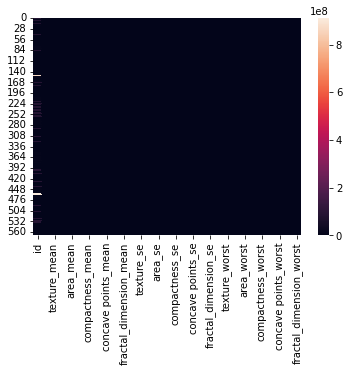

In [18]:
sns.heatmap(X)

talking about th key insight lets take a look at relation among all

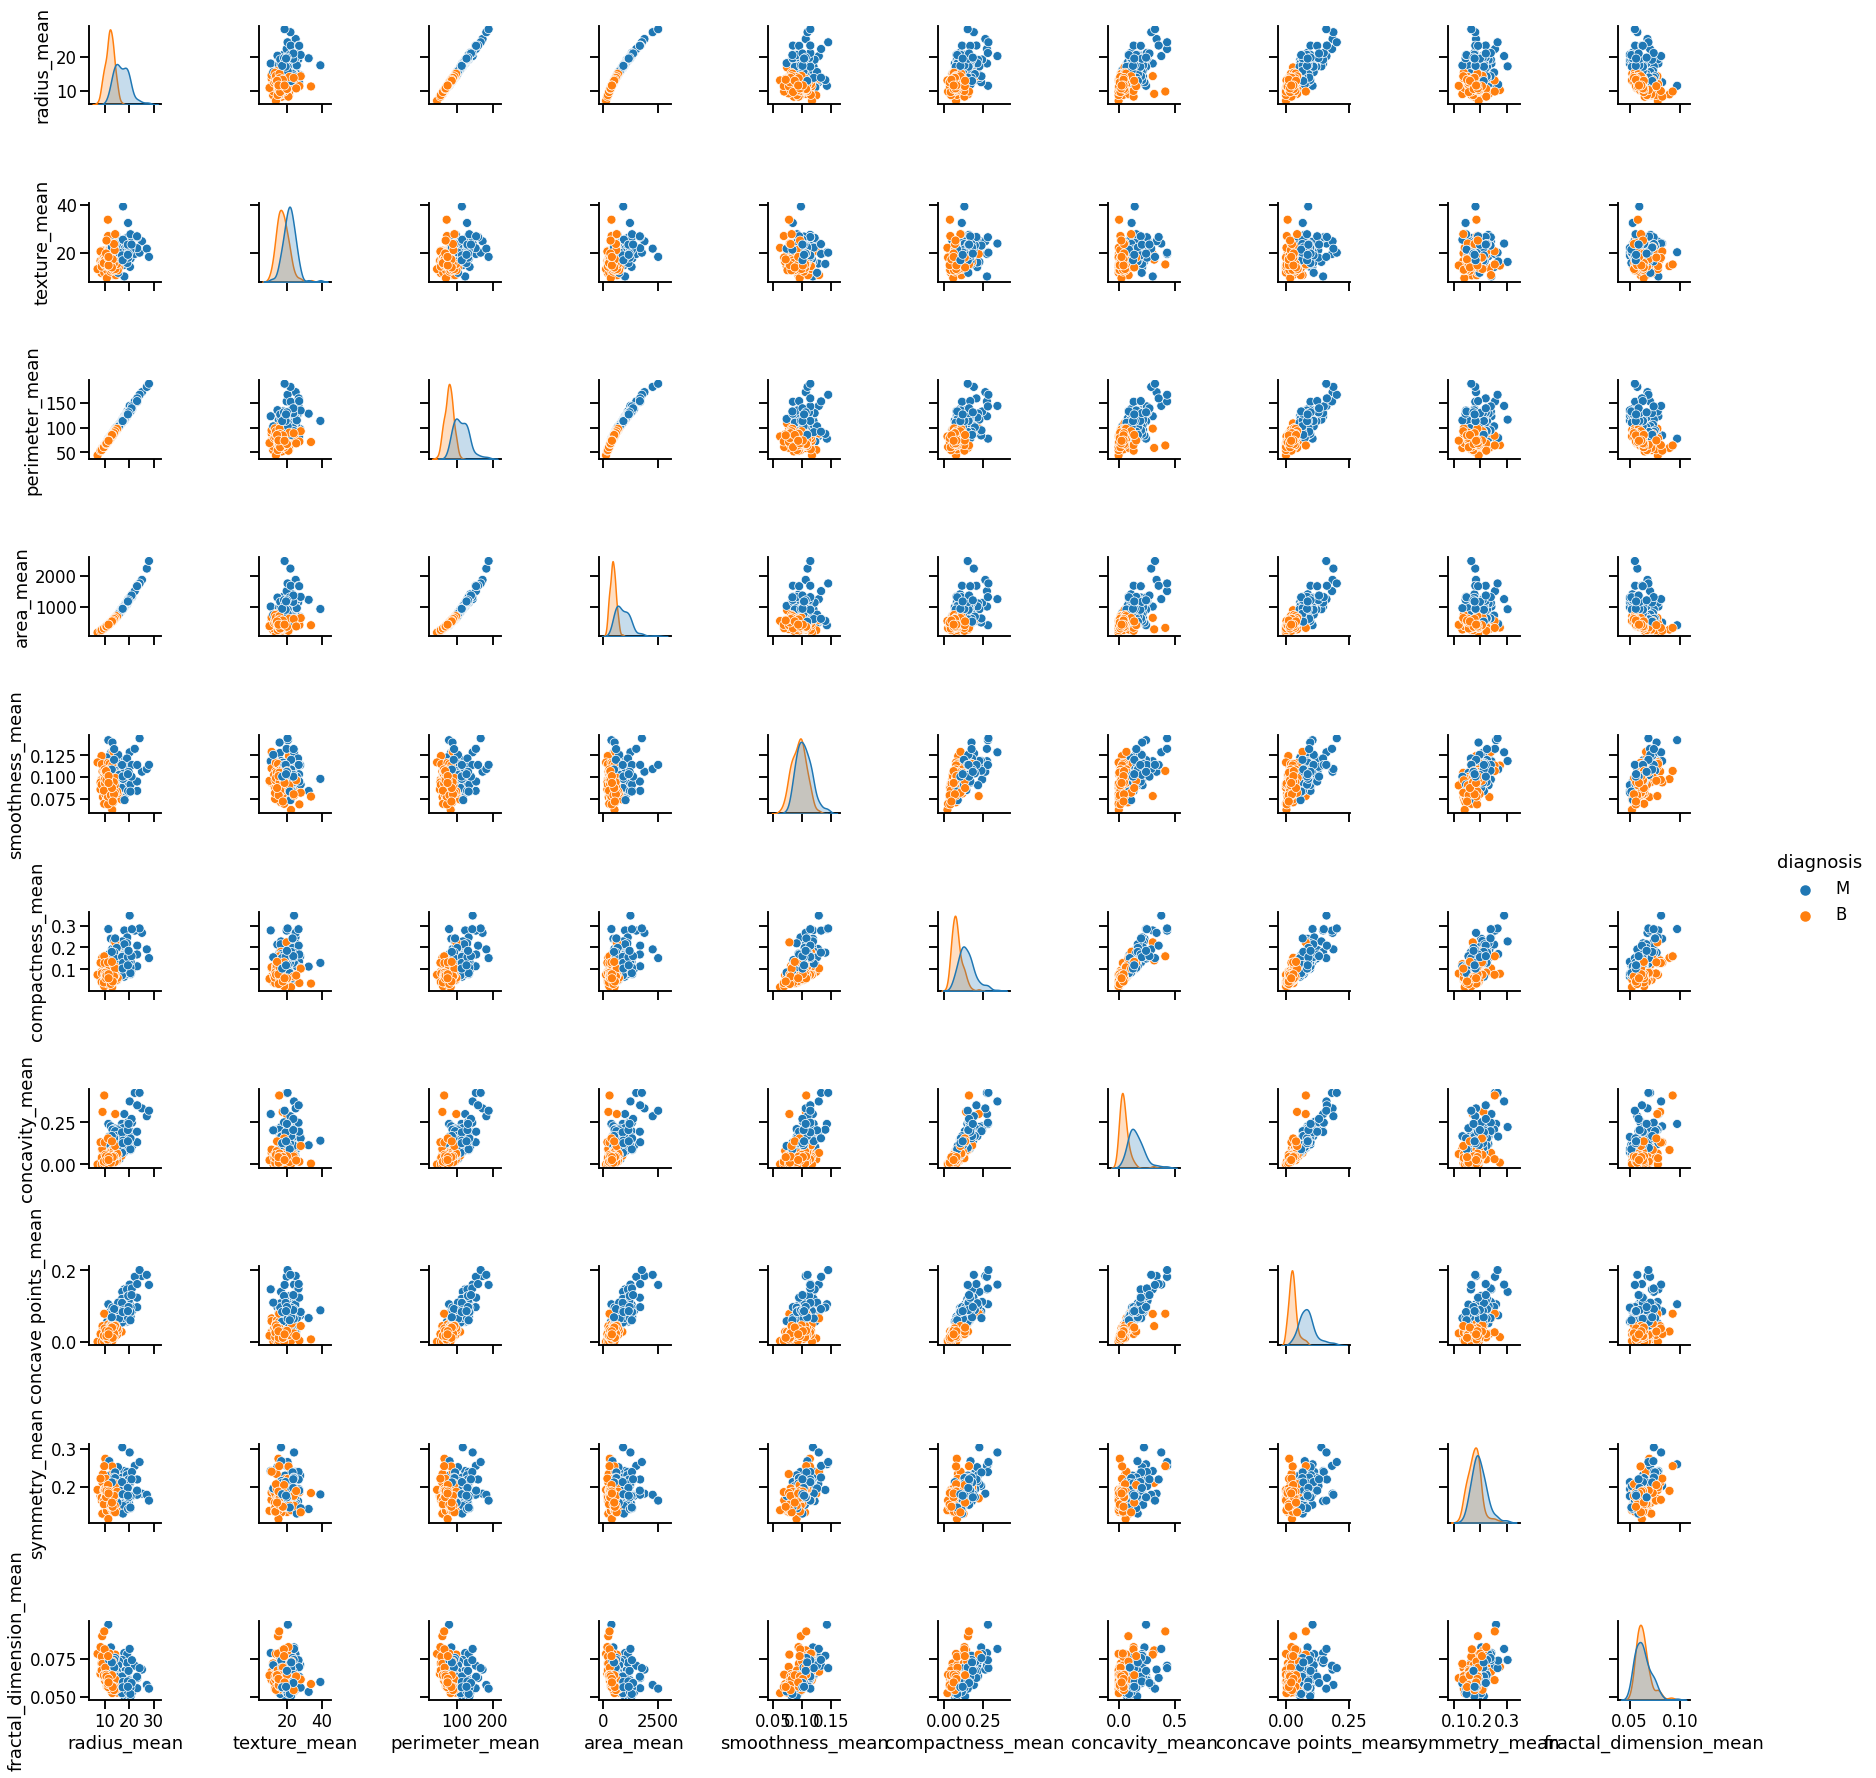

In [38]:
sns.pairplot(dftrain.iloc[:255,1:12],hue='diagnosis')

from the above pairplot you could see that how radius mean is directly proportional to B and how concave point in low which indiacate the there are high chances of B

In [19]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [20]:
Y.unique()

array(['M', 'B'], dtype=object)

as Y is a categorical column so by using lambda function we are converting the strings into int value like 1,0

In [5]:
Y.apply(lambda x:1 if x=='M' else 0)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [8]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=True)

In [9]:
from sklearn.preprocessing import StandardScaler

here we are scaling our test and train data

In [17]:
s=StandardScaler()
xtr_s=s.fit_transform(xtr)
xte_s=s.fit_transform(xte)

Here in this section we are using various numbers of classification models such as knearestneighbors,support vector machine, logistic regression,random forest classifier.<br>
By using Cross val score we are predicting which model is more suitable for our dataset and how other are not

In [24]:
knn=KNeighborsClassifier()
sup=SVC()
lr=LogisticRegression()
rf=RandomForestClassifier()

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
knn1=cross_val_score(knn,xtr_s,ytr,cv=5)
knn1.mean()

0.9670329670329672

In [29]:
sup1=cross_val_score(sup,xtr_s,ytr,cv=5)
sup1.mean()

0.9670329670329669

In [27]:
rfc=cross_val_score(rf,xtr_s,ytr,cv=5)
rfc.mean()

0.9494505494505494

In [28]:
lrc1=cross_val_score(lr,xtr_s,ytr,cv=5)
lrc1.mean()

0.9670329670329669

Amoung the above models 3 model have performed well and showed above 95% accuracy and only randomforest have performed below 95% accuracy

In [30]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', lr), ('rf',rf), ('knn', knn),('svm',sup)], voting='hard')
eclf1 = eclf1.fit(xtr_s, ytr)

In [31]:
ypre=eclf1.predict(xte_s)

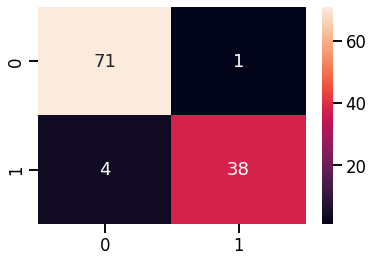

In [32]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(yte, ypre)
ax = sns.heatmap(cm, annot=True, fmt='d')

talking about the best suited model then it could be amoung logistic regression,support vector and knearest neighbors.

#Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

In this dataset the data was clean and doesn't contain much null values or categorical values.<br>
but for this ananlysis without much paremeter tuning accuracy as above 95% is achived easily and more prediction models such as unsupervised model could be used to look for any other possible relation that could make this model more accurate